In [1]:
### SVR Model Forecasting ###
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('bmh')

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Get Data Frames from Yahoo! Finance
# yfinance is used to fetch data 
yf.pdr_override()
# input
symbol = 'AAPL'
start = '2020-10-01'
end = '2020-10-31'
# Read data 
df = yf.download(symbol,start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,117.639999,117.720001,115.830002,116.790001,116.588860,116120400
2020-10-02,112.889999,115.370003,112.220001,113.019997,112.825348,144712000
2020-10-05,113.910004,116.650002,113.550003,116.500000,116.299355,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,112.965111,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,114.881805,96849000
2020-10-08,116.250000,116.400002,114.589996,114.970001,114.771988,83477200
2020-10-09,115.279999,117.000000,114.919998,116.970001,116.768547,100506900
2020-10-12,120.059998,125.180000,119.279999,124.400002,124.185753,240226800
2020-10-13,125.269997,125.389999,119.650002,121.099998,120.891434,262330500


In [10]:
# Get the number of columns and rows
df.shape

(22, 6)

In [11]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.672516,190272600


In [12]:
# Prepare the data for training the SVR models
# Get all of the data except for the last row
df = df.head(df.shape[0]-1)
# Print data
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  117.639999  117.720001  115.830002  116.790001  116.588860   
2020-10-02  112.889999  115.370003  112.220001  113.019997  112.825348   
2020-10-05  113.910004  116.650002  113.550003  116.500000  116.299355   
2020-10-06  115.699997  116.120003  112.250000  113.160004  112.965111   
2020-10-07  114.620003  115.550003  114.129997  115.080002  114.881805   
2020-10-08  116.250000  116.400002  114.589996  114.970001  114.771988   
2020-10-09  115.279999  117.000000  114.919998  116.970001  116.768547   
2020-10-12  120.059998  125.180000  119.279999  124.400002  124.185753   
2020-10-13  125.269997  125.389999  119.650002  121.099998  120.891434   
2020-10-14  121.000000  123.029999  119.620003  121.190002  120.981277   
2020-10-15  118.720001  121.199997  118.150002  120.709999  120.502106   
2020-10-16  121.279999  121.550003  11

In [13]:
## Create empty list to store the independent and dependent data
# Get the dats and adjusted close prices
df_days = df.index
df_adj_close = df.loc[:,'Adj Close']

In [14]:
# Create independent dataset
days = [[int(str(day).split('-')[2].split(' ')[0])] for day in df.index]

adj_close_prices = [float(adj_close_price) for adj_close_price in df.loc[:,'Adj Close']]

print(days)
print(adj_close_prices)

[[1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29]]
[116.58885955810547, 112.82534790039062, 116.29935455322266, 112.9651107788086, 114.88180541992188, 114.77198791503906, 116.76854705810547, 124.18575286865234, 120.89143371582031, 120.98127746582031, 120.50210571289062, 118.81501007080078, 115.7802505493164, 117.3076171875, 116.6687240600586, 115.55064392089844, 114.84187316894531, 114.85185241699219, 116.39917755126953, 111.00847625732422, 115.12138366699219]


In [15]:
## Create the 3 support vector regression Models
# Create and train a SVR model usong a linear kernel
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a polinomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create ans train a SVR model using RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma= 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

[]

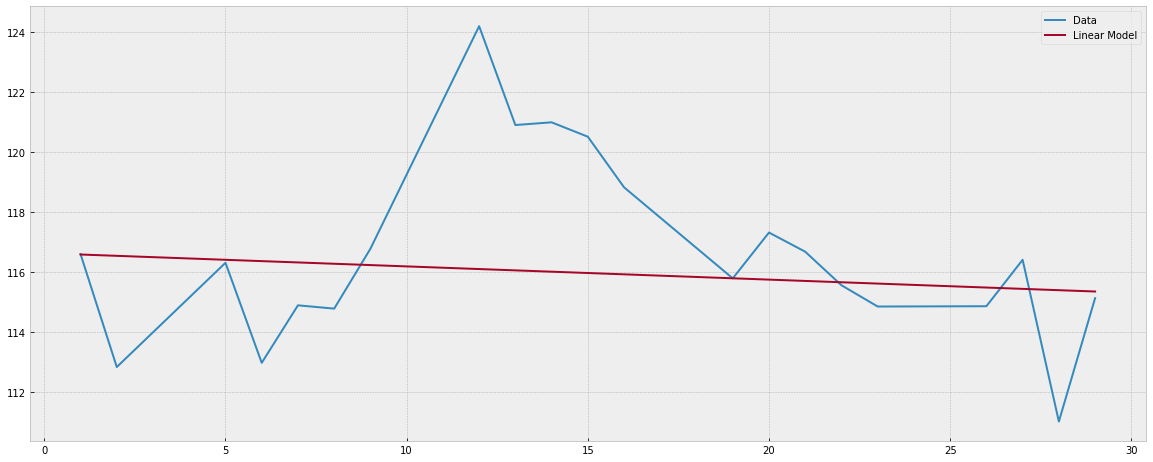

In [16]:
# Visualize Prediction
plt.figure(figsize=(20,8))
plt.plot(days, adj_close_prices, label = 'Data')
plt.plot(days, lin_svr.predict(days), label = 'Linear Model')
plt.legend()
plt.plot()

[]

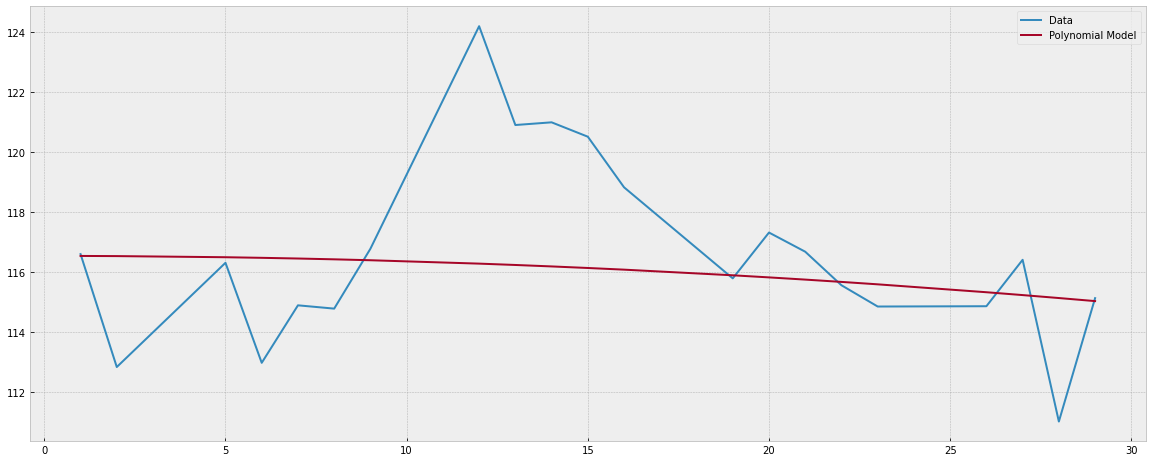

In [17]:
# Visualize Prediction
plt.figure(figsize=(20,8))
plt.plot(days, adj_close_prices, label = 'Data')
plt.plot(days, poly_svr.predict(days), label = 'Polynomial Model')
plt.legend()
plt.plot()

[]

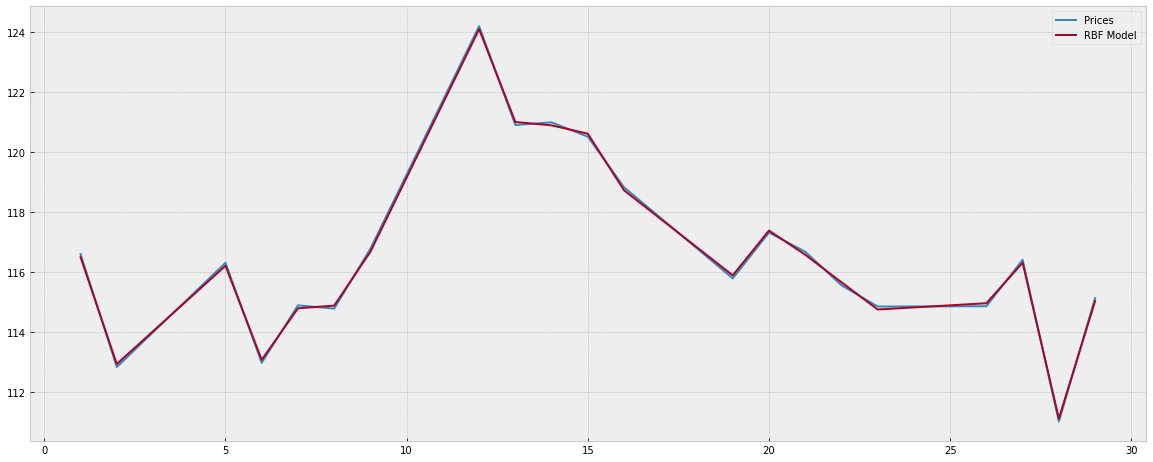

In [19]:
# Visualize Prediction
plt.figure(figsize=(20,8))
plt.plot(days, adj_close_prices, label = 'Prices')
plt.plot(days, rbf_svr.predict(days), label = 'RBF Model')
plt.legend()
plt.plot()

[]

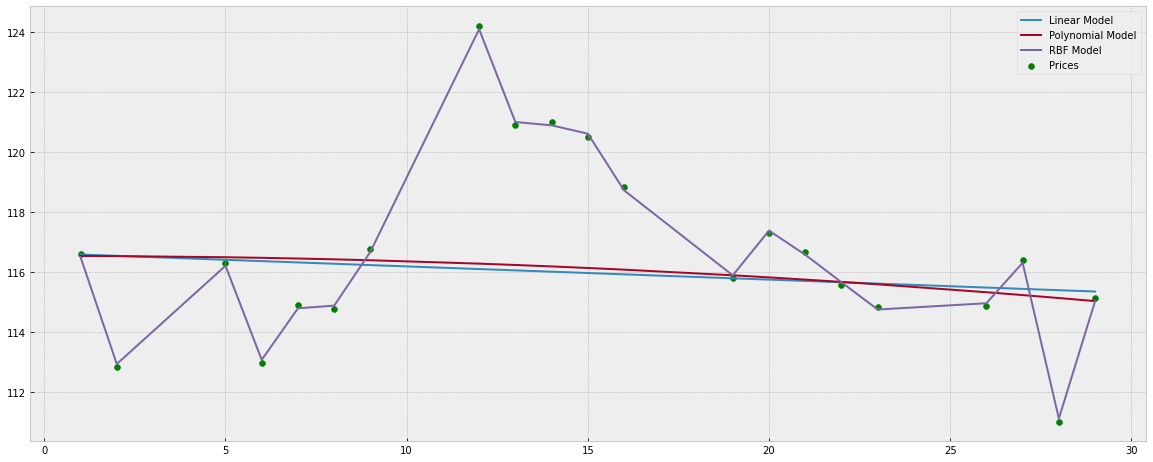

In [20]:
# Visualize Prediction putting all together
plt.figure(figsize=(20,8))
plt.scatter(days, adj_close_prices, color='g', label = 'Prices')
plt.plot(days, lin_svr.predict(days), label = 'Linear Model')
plt.plot(days, poly_svr.predict(days), label = 'Polynomial Model')
plt.plot(days, rbf_svr.predict(days), label = 'RBF Model')
plt.legend()
plt.plot()

In [21]:
# Show the predicted price for the given day
day = [[30]]

print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))
print('The RBF SVR predicted:', rbf_svr.predict(day))

The Linear SVR predicted: [115.29830951]
The Polynomial SVR predicted: [114.91676358]
The RBF SVR predicted: [129.84682475]


In [22]:
# Print the actual price of the sctock on day 30
actual_price['Adj Close'][0]

108.67251586914062